# Introduction to Machine Learning Exercise 5
# Matias Paloranta
## Problem 1
### a)
We have to show that 
$$x^*=\arg\min_{x^\prime} \sum_{i=1}^{n} (x_i-x^\prime )^2=\frac{1}{n}\sum_{i=1}^{n}x_i,$$
i.e. the minimum of the sum of squared errors is given by the average of $x_i$. So we proceed by defining
$$f(x^\prime)\equiv \sum_{i=1}^{n} (x_i-x^\prime )^2,$$
and finding its extrema, i.e. the points where the derivative vanishes.
Differentiating $f(x^\prime)$ and setting the derivative equal to zero we find
\begin{align}
\frac{d}{dx^\prime}f(x^\prime) &= -2 \sum_{i=1}^{n} (x_i-x^\prime )=2nx^\prime -2\sum_{i=1}^n x_i = 0 \\
\implies x^\prime &= \frac{1}{n}\sum_{i=1}^n x_i.
\end{align}
Next we observe that
$$\frac{d^2}{dx^{\prime 2}}f(x^\prime) = 2n > 0, \quad\quad \forall n \geq 1.$$
Thus, by the second derivative test, the point 
$$x^\prime = \frac{1}{n}\sum_{i=1}^n x_i$$
is a local minimum, and because $f(x^\prime)$ is a upwards opening parabola, it is also the global minimum. Therefore
$$x^* = \frac{1}{n}\sum_{i=1}^n x_i.$$


### b)
Now we have to show that
$$\boldsymbol{x}^* = \arg\min_{\boldsymbol{x}^\prime} \sum_{i=1}^{n} \|\boldsymbol{x}_i-\boldsymbol{x}^\prime \|^2_2=\frac{1}{n}\sum_{i=1}^{n}\boldsymbol{x}_i .$$
Again, first we define
$$f(\boldsymbol{x}^\prime)\equiv \sum_{i=1}^{n} \|\boldsymbol{x}_i-\boldsymbol{x}^\prime \|^2_2=\sum_{i=1}^n \sum_{j=1}^{p} (x_{ij}-x^\prime_j)^2.$$
The minimum of the sum can be obtained by finding the minimum of each component of the $p$-dimensional vector $\boldsymbol{x}^*$ separately, which reduces $\boldsymbol{x}^*$ to 
$$\boldsymbol{x}^* = \arg \min_{\boldsymbol{x}^\prime} f(\boldsymbol{x}^\prime)= \left(\arg\min_{x^{\prime}_1} \sum_{i=1}^n (x_{i1}-x^\prime_1)^2,\dots ,\arg\min_{x^\prime_p} \sum_{i=1}^n (x_{ip}-x^\prime_p)^2 \right)=\left( \frac{1}{n}\sum_{i=1}^n x_{i1},\dots, \frac{1}{n}\sum_{i=1}^n x_{ip}\right)=\frac{1}{n}\sum_{i=1}^n \boldsymbol{x}_i,$$
where we used the result obtained in part \textbf{a)}. 

## Problem 2
### a)
First with single linkage.
![](single.png)

### b)
And then with complete linkage.
![](complete.png)

The first three joins are the same with both linkages, but the remaining joins differ.

## Problem 3
### a)

In [129]:
#Input
#data - should be a matrix of n (=rows) p(=columns)-dimensional vectors
#k - number of clusters
#centroids - initial placement of the centroids, default is random. k*p dimensional matrix
#maxIters - maximum number of iterations until the algorithm stops, if no convergence before that. Default=100

#Output
#centroids - returns the centroids of the final clusters
#clusters - cluster assignments for the n data points

kMeans <- function(data, k, centroids = NULL, maxIters = 100) {
    n <- nrow(data) #number of data points
    p <- ncol(data) #dimensionality of the points
    clusters <- NULL #initially
    
    if(is.null(centroids)) {
        centroids <- matrix(numeric(k*p), nrow = k) #matrix of the cluster centroids
        #for each data point vector, randomly allocate a cluster from k options
        clusters <- sample(k, n, replace = T)
        #now the first element of clusters is the cluster of the first data point (row) of the input data, etc.
    }
    
    #next we initialize a distance matrix between each cluster and data point
    distanceMatrix <- matrix(numeric(n*k), nrow = n)
    #the previous cluster assignments to test if there is any change
    previous <- NULL
    
    for(iter in 1:maxIters) {
        #compute the centroids for each cluster
        if (!is.null(clusters)) {
            for(cluster in 1:k) {
                centroids[cluster, ] <- colMeans(data[clusters == cluster, ])  
            }
        }
    
        #update the distance matrix
        for(row in 1:nrow(distanceMatrix)) {
            for(col in 1:ncol(distanceMatrix)) {
                distanceMatrix[row,col] <- sum((data[row, ] - centroids[col, ])^2)
            }
        }
        
        #for each data point, choose the closest cluster
        previous <- clusters
        clusters <- apply(distanceMatrix, 1, which.min)

        #break if no change to previous cluster assignments
        if(identical(clusters, previous)) {
            cat("Converged! :) \n")
            return(list("centroids" = centroids, "clusters" = clusters))
        }
    }
    #if we get to this point, the algorithm has failed to converge before reaching maxIters
    cat("Failed to converge :(")
    return(list("centroids" = centroids, "clusters" = clusters))
}                                             

Test with $n=100$ random points from the bivariate normal distribution with $\mu=(0,0)$, $\Sigma = \text{diag}(1,1)$ and $k=3$ clusters.

Converged! :) 
Converged! :) 


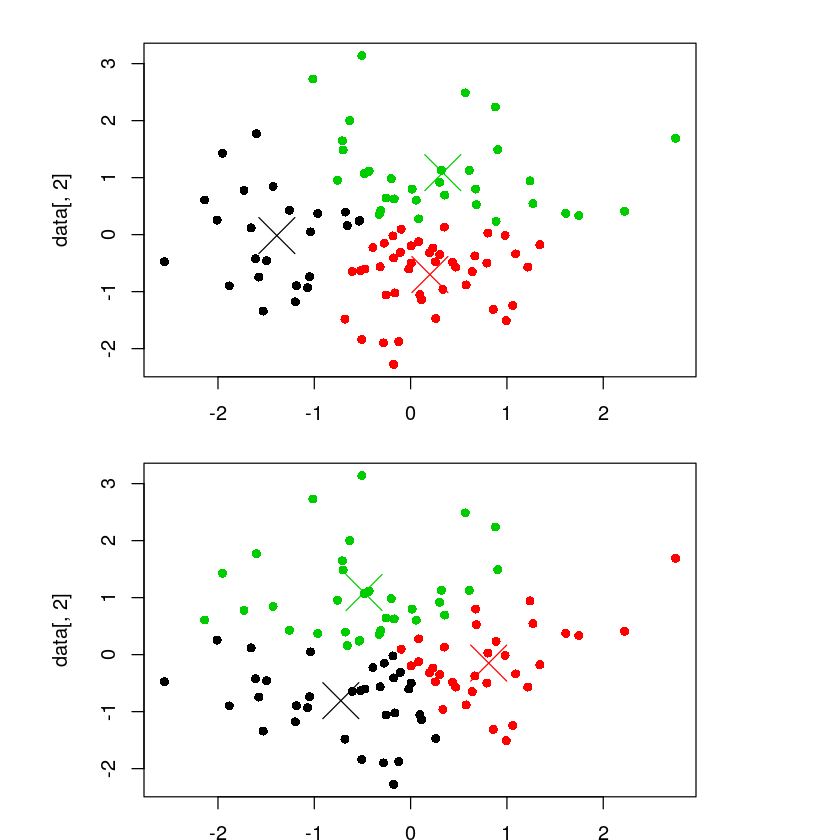

In [114]:
set.seed(1226) #seed for reproducibility
data <- matrix(rnorm(100*2, 0, 1), nrow = 100)

par(mfrow = c(2,1), mar = c(1.8, 6, 1.8, 6))
for(i in 1:2) {
    k_means <- kMeans(data, 3)
    plot(data[ ,1], data[ ,2], pch = 16, col = k_means$clusters)
    lines(k_means$centroids[ ,1], k_means$centroids[ ,2], type = "p", pch = 4, cex = 4, col = (1:4))
}

The final clusters seem to differ most of the time, because the initial placement is random.

### b)
The below code assumes that the MNIST data has already been downloaded and extracted and that load_mnist() knows the path to that location (e.g. the working folder). 

The digit is  9

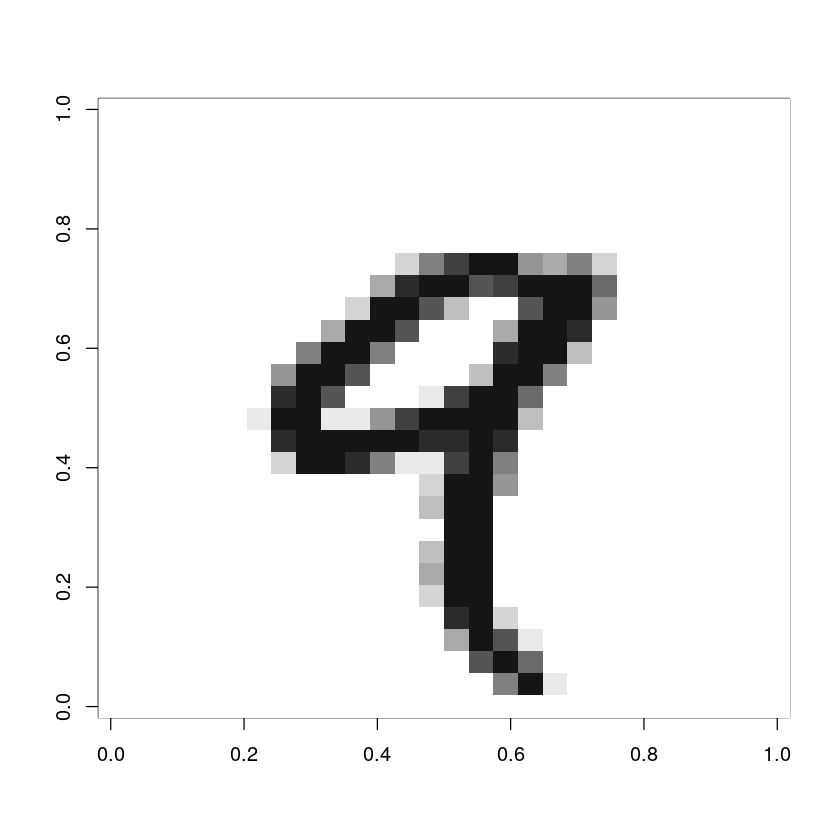

In [103]:
source("load_mnist.R")
load_mnist()

show_digit(train$x[5,])
cat("The digit is ", train$y[5])

Seems to work.

### c)

Let's test the algorithm by using the first 500 points of the MNIST training data, $k=10$ clusters and setting the initial cluster means equal to the first $10$ images in the data set.

Converged! :) 


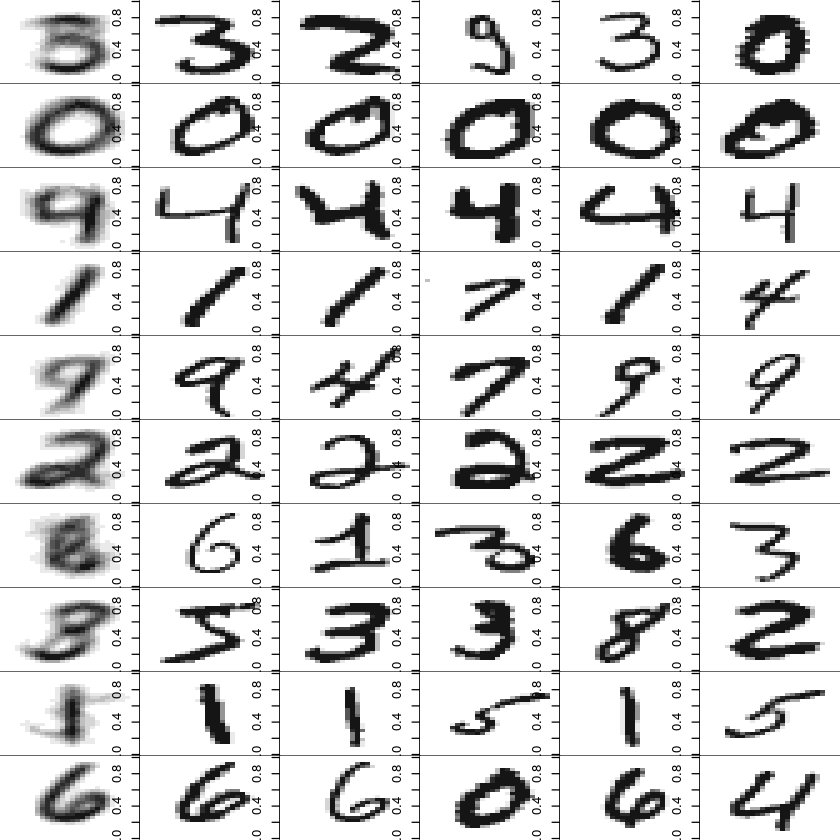

In [138]:
data <- train$x[1:500, ]

initial <- matrix(numeric(10*ncol(data)), nrow = 10)
for(i in 1:10) {
    initial[i, ] <- data[i, ]
}

k_means <- kMeans(data, k=10, centroids = initial)

#plot the mean vectors of the clusters, and the first five digits belonging to each cluster
par(mfrow = c(10, 6), mar = c(0,0,0,0))
for(i in 1:10) {
    show_digit(k_means$centroids[i, ])
    #find the digits with cluster assignment i and compare if they resemble the mean
    indices <- k_means$clusters == i
    digits <- data[indices, ]
    for(j in 1:5) {
        show_digit(digits[j,])
    }
}

In many clusters there appearseveral different digits, although with kind of similar shapes. However, some of them (such as 0, 2 and 4) appear to be pretty homogenous clusters.

### d)
Repeat part **c)** but the initial cluster means are now the first instance of each class.

Converged! :) 


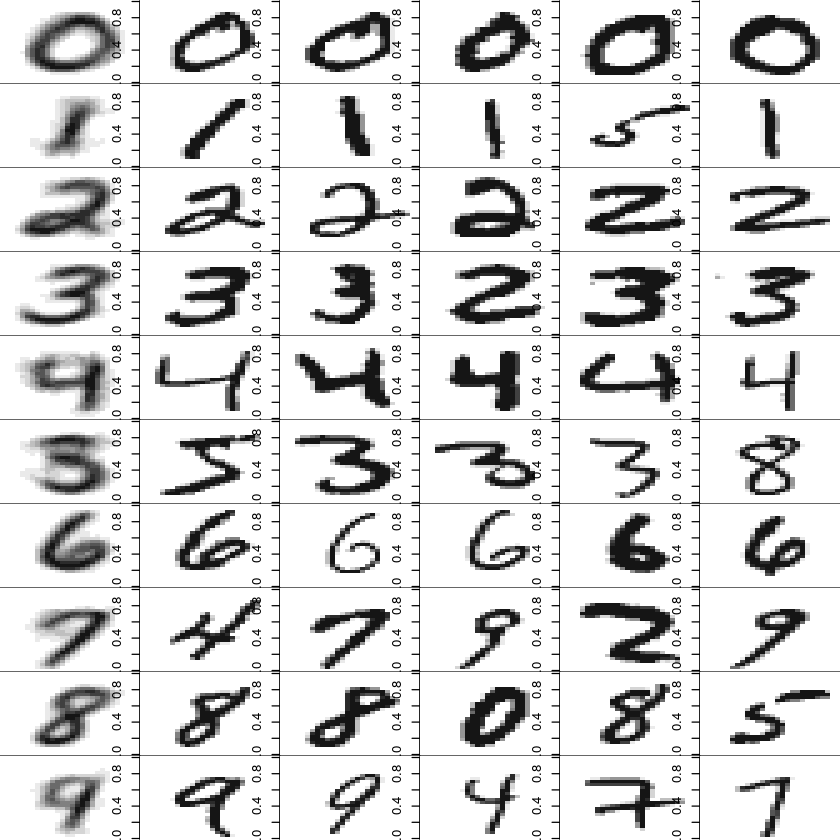

In [136]:
initial <- matrix(numeric(10*ncol(data)), nrow = 10)

#find the index of the first instance of each class
for(i in 0:9) {
    initial[i+1, ] <- data[which(train$y[1:500] == i)[1], ]
}

k_means <- kMeans(data, k=10, centroids = initial)

#plot the mean vectors of the clusters, and the first five digits belonging to each cluster
par(mfrow = c(10, 6), mar = c(0,0,0,0))
for(i in 1:10) {
    show_digit(k_means$centroids[i, ])
    #find the digits with cluster assignment i and compare if they resemble the mean
    indices <- k_means$clusters == i
    digits <- data[indices, ]
    for(j in 1:5) {
        show_digit(digits[j,])
    }
}

The performance seems to have improved, with more digits resembling each other in a given cluster, and the cluster means also closely resemble the given initial values.